# Proyecto Final de Ciencia de Datos en Python

In [2]:
import numpy as np, seaborn as sns, matplotlib.pyplot as plt, pandas as pd

## cargamos la data
data_set = np.load('proyecto_data/proyecto_training_data.npy')

## definimos las columnas
columns   = ['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage']

## definimos el set de entrenamiento como un DataFrame, obteniendo el 80% del data set completo
training_set        = pd.DataFrame(data_set[: int(len(data_set) * 0.8)], columns = columns)
                    
## definimos el set de pruebas y validación como un DataFrame, obteniendo el 20% del data set completo
validation_test_set = pd.DataFrame(data_set[int(len(data_set) * 0.8):], columns = columns)

In [3]:
training_set.head()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


In [4]:
validation_test_set.head()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,235000.0,6.0,1236.0,7.0,1935.0,120.0
1,625000.0,10.0,1831.0,10.0,1995.0,118.0
2,171000.0,6.0,1118.0,6.0,1977.0,76.0
3,163000.0,6.0,1261.0,6.0,1958.0,76.0
4,171900.0,7.0,625.0,5.0,2006.0,35.0


In [5]:
len(training_set)

1168

In [6]:
len(validation_test_set)

292

## Análisis exploratorio de datos

In [7]:
## Obtener la media de los datos
media = np.nanmean(training_set, axis=0)
media

array([1.80590277e+05, 6.10102740e+00, 1.15632363e+03, 6.48544521e+00,
       1.97145120e+03, 6.99469854e+01])

In [8]:
## Obtener el valor máximo de los datos
max_data = np.nanmax(training_set, axis = 0)
max_data

array([7.550e+05, 1.000e+01, 3.228e+03, 1.400e+01, 2.010e+03, 3.130e+02])

In [9]:
## obtener el valor mínimo de los datos
min_data = np.nanmin(training_set, axis = 0)
min_data

array([3.490e+04, 1.000e+00, 3.340e+02, 2.000e+00, 1.875e+03, 2.100e+01])

In [10]:
## Obtener el rango (peak to peak) de los datos
peak_to_peak = max_data - min_data
peak_to_peak

array([7.201e+05, 9.000e+00, 2.894e+03, 1.200e+01, 1.350e+02, 2.920e+02])

In [11]:
## Obtener la desviacion estandar de los datos
std_data = np.nanstd(training_set, axis = 0)
std_data

array([7.87819511e+04, 1.37743519e+00, 3.73620332e+02, 1.60845172e+00,
       2.99388821e+01, 2.34659548e+01])

## Histograma para cada variable (seaborn)

In [463]:
## utilización de seaborn

def draw_hist(data):
    """Draw for each variable of the set 
    its respective histogram through seaborn"""
    
    fig, axes = plt.subplots(figsize=(25,25),nrows=3,ncols=2)
    sns.set_theme()
    for i in range(data.shape[1]):
        sns.distplot(data.iloc[:,i], kde=False, bins=15, ax=axes[i//2,i%2])
        #sns.set_context("talk")
    plt.show()

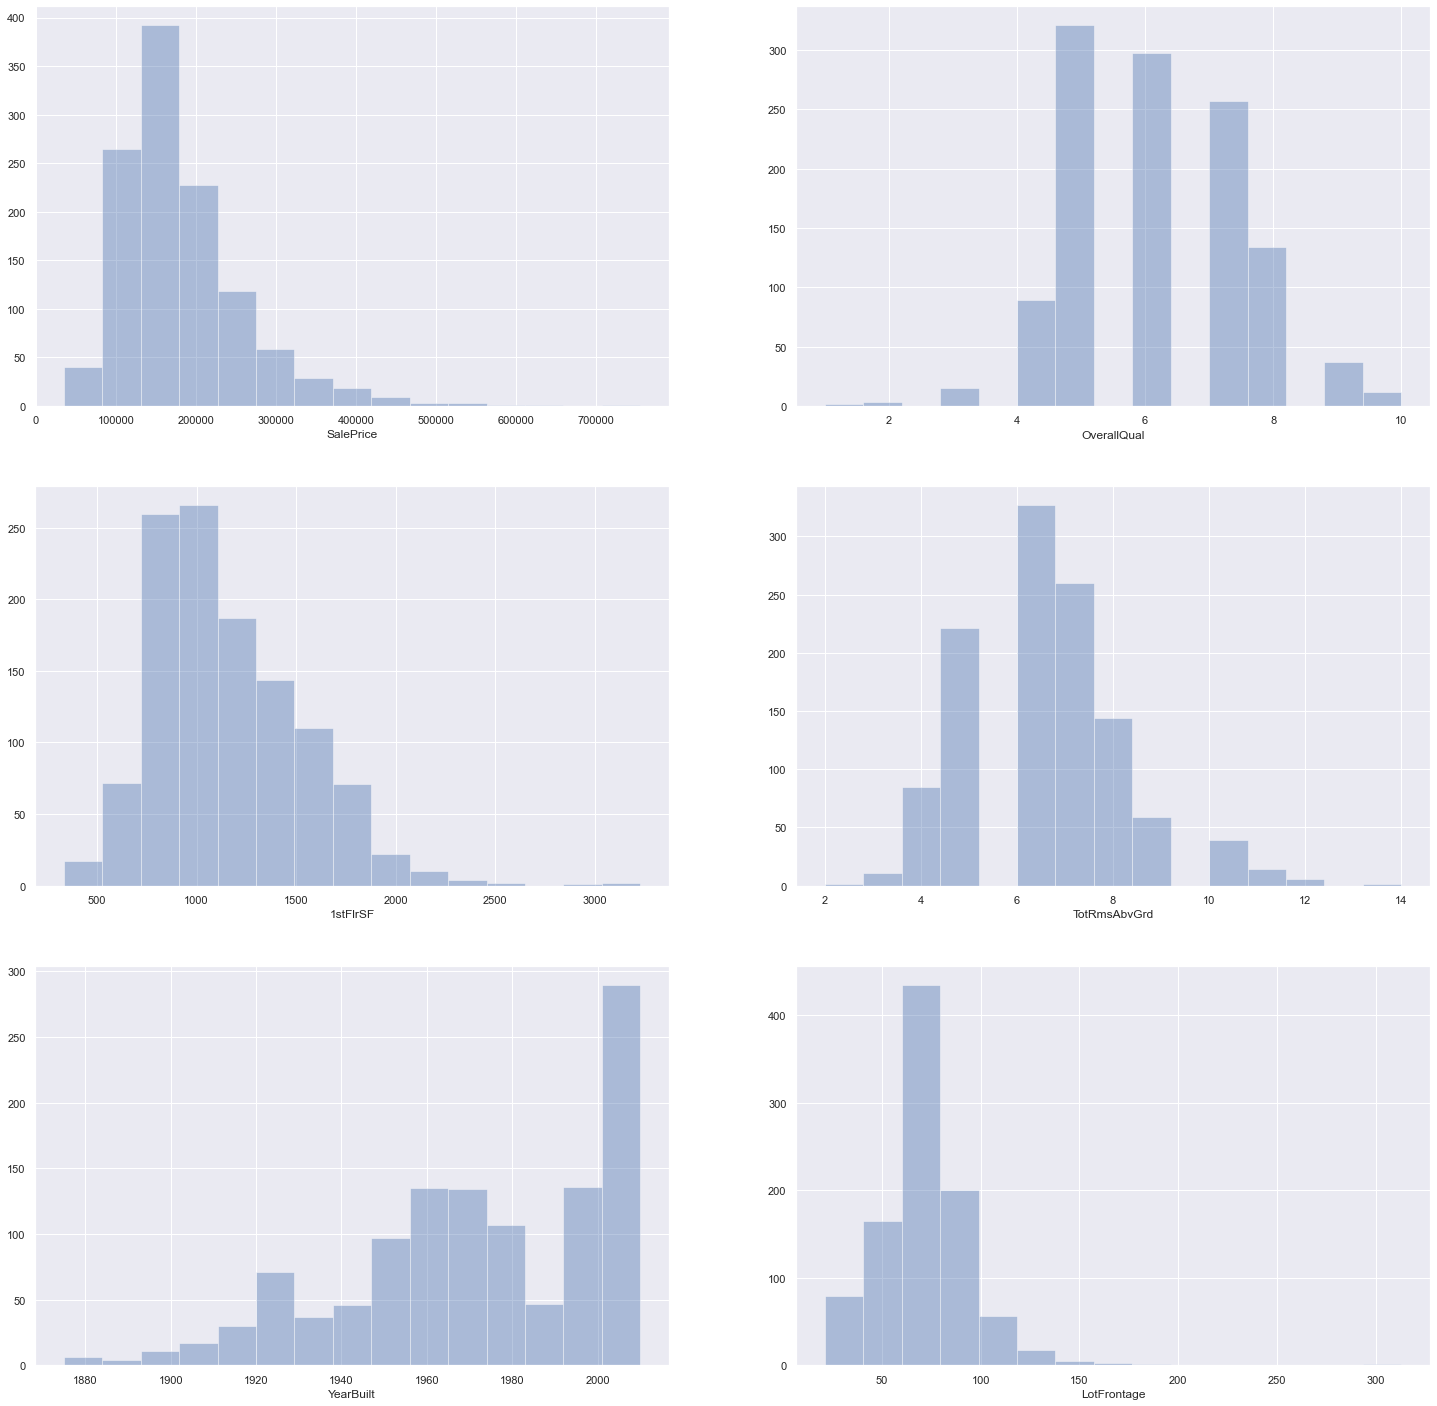

In [465]:
draw_hist(training_set)

## Coeficiente de correlación y gráfica de Dispersión

In [15]:
def get_corr_data(data):
    """Calculate for each independent variable X and Y (SalePrice), 
    the correlation coefficient."""
    return data.corr()

In [16]:
corr = get_corr_data(training_set)
corr.loc[:,'SalePrice']

SalePrice       1.000000
OverallQual     0.793990
1stFlrSF        0.616289
TotRmsAbvGrd    0.564707
YearBuilt       0.534171
LotFrontage     0.363292
Name: SalePrice, dtype: float64

In [17]:
def draw_scatter(data):
    """Plot for each independent variable X and Y (SalePrice), 
    the scatter plot."""
    
    color_arr = np.random.rand(len(data))
    fig, axes = plt.subplots(figsize=(25,25), nrows=3, ncols=2)

    for i in range(data.shape[1] - 1):
        axes[i//2,i%2].scatter(data.iloc[:,i+1], data.iloc[:,0], alpha=0.7, c = color_arr)
        axes[i//2,i%2].set_title(f"Coeficiente de correlación: {corr.loc[:,'SalePrice'][i+1]}")
        axes[i//2,i%2].set_xlabel(data.iloc[:,i+1].name)
        axes[i//2,i%2].set_ylabel(data.iloc[:,0].name)
    plt.tight_layout()
    plt.show()

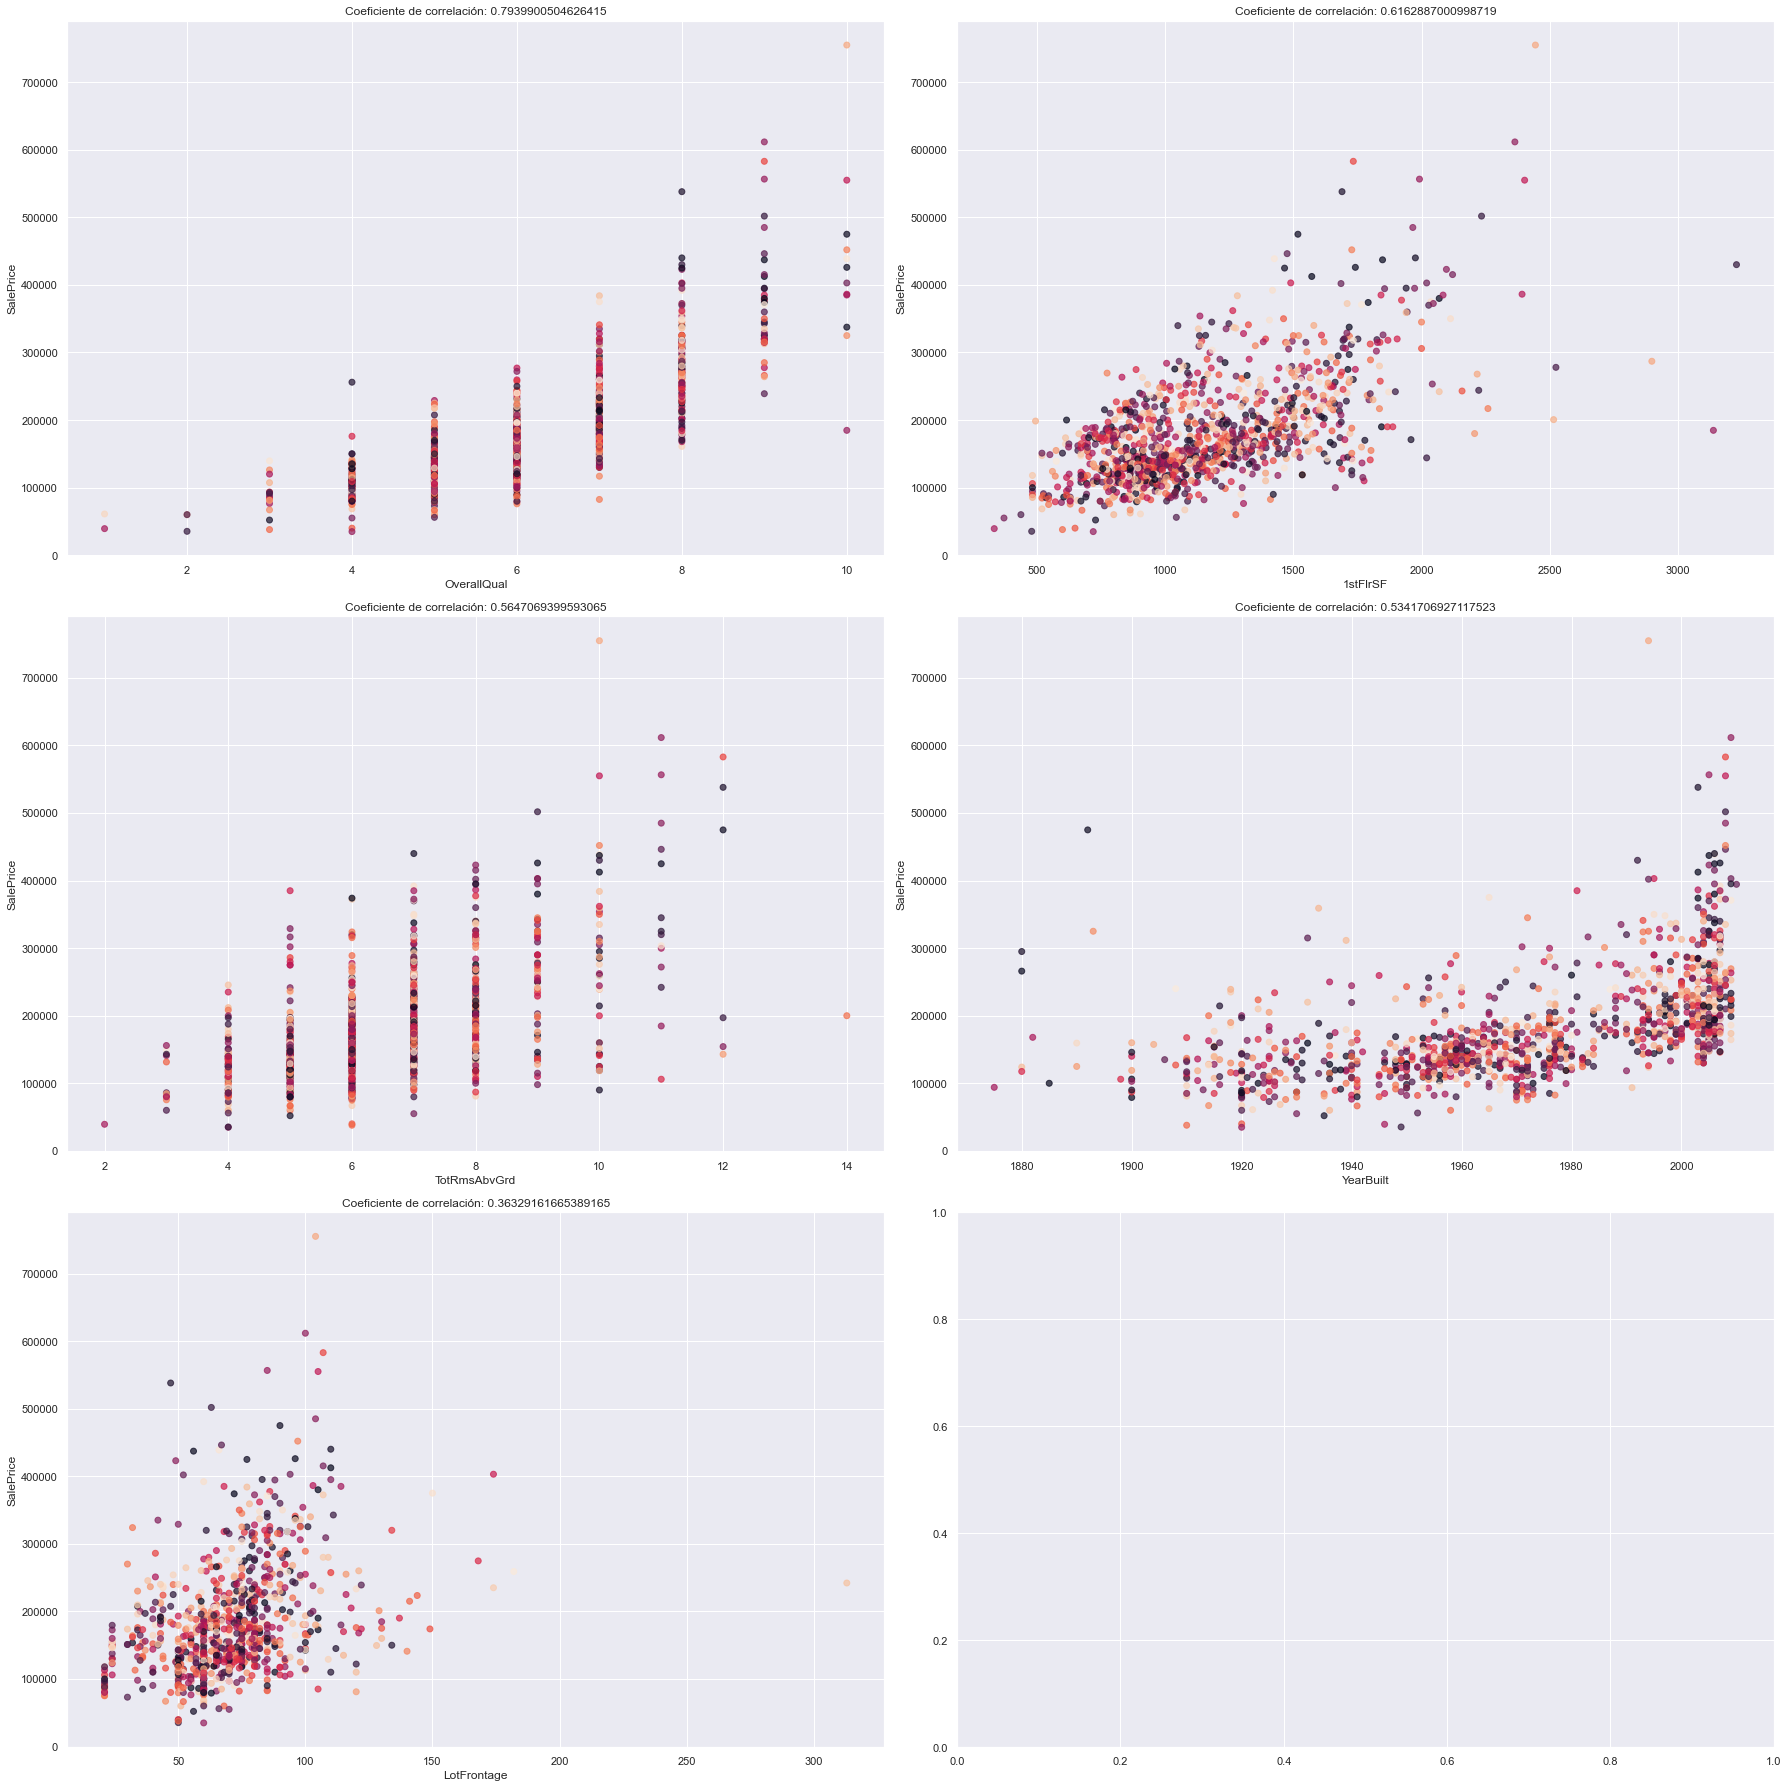

In [466]:
draw_scatter(training_set)

In [35]:
## De acuerdo a la gráfica y el resultado del coeficiente de correlación
## OverallQual como variable independiente X1 y SalePrice  como variable dependiente,
##tiene un coeficiente de correlación muy alto casi cercano al 1
X1 = training_set.loc[:, ['OverallQual']]
X1.head()

,OverallQual
0,7.0
1,6.0
2,7.0
3,7.0
4,8.0


In [44]:
## 1stFlrSF como variable independiente X2 y SalePrice  como variable dependiente,
##tiene un coeficiente de correlación muy alto casi cercano al 1
X2 = training_set.loc[:, ['1stFlrSF']]
X2.head()

,1stFlrSF
0,856.0
1,1262.0
2,920.0
3,961.0
4,1145.0


## Modelo de Entrenamiento

In [490]:
class regresion_lineal:
    """
    Una regresion lineal, tendrá las siguientes funciones para el entrenamiento de los datos.
    Además en el constructor recibirá data de X y Y, además el número de iteraciones para entrenar el modelo,
    el indicador para imprimir el error,
    y el learning_rate
    """
    
    def __init__(self, x, y, epochs, imprimir_error_cada, learning_rate):
        """Constructor que inicializará las variables necesarias para el modelo"""
        self.x1             = np.hstack([x.reshape(-1, 1), np.ones_like(x).reshape(-1, 1)])
        self.x              = x
        self.y              = y
        self.betas          = np.array([[1],[1]])
        self.epochs         = epochs
        self.err_ban        = imprimir_error_cada
        self.learn_rate     = learning_rate
        self.all_errors     = {}
        self.all_betas      = {}
        
        self.__epochs_loop()
        self.draw_errtime()
    
    
    def __epochs_loop(self):
        """Ciclo que entrenará el modelo"""
        
        n = len(self.x1)
        for i in range(1, self.epochs+1):
            
            # formula vectorizada para cada predicción x1, obteniendo el vector predict_y
            self.predict_y = np.dot(self.x1, self.betas)
            
            # calcular el error usando 'y' y 'predict_y'
            err = (1/(2*n))*((self.y - self.predict_y)**2).sum()
            if i % self.err_ban == 0:
                print(f'No.Iteración: {i}, Error: {err}')
            self.all_errors[i] = err
                
            #cálculo de gradiente del error respecto a las betas
            self.grads = ((1/n) * np.dot(np.transpose(self.predict_y - self.y), self.x1)).reshape(-1,1)
            self.betas = np.dot(np.hstack([self.betas, self.grads]), np.array([[1], [-self.learn_rate]]))
            self.all_betas[i] = self.betas
        
        print (f"\n\n Betas: {self.all_betas} \n\n Errores: {self.all_errors} \n\n")
        
    
    def draw_errtime(self):
        """Maneja los errores encontrados y los dibuja con matplotlib"""
        plt.plot(np.arange(1, self.epochs+1) ,self.all_errors.values(), color='r')
        plt.title('Gráfica de Errores en el Tiempo')
        plt.xlabel('X-Epochs')
        plt.ylabel('Error')
        plt.show()
    
    def draw_models_in_time(self, iteraciones):
        """Muestra cómo funciona el modelo entrenado con el tiempo"""
        
        for i in range(1, self.epochs+1):
            
            if i % iteraciones == 0:
                aux_y = np.dot(self.x1, self.all_betas[i])
                plt.plot(self.x, aux_y)
    

No.Iteración: 10, Error: 1524634201.39041
No.Iteración: 20, Error: 1376512960.1914408
No.Iteración: 30, Error: 1366537288.0272982
No.Iteración: 40, Error: 1357562806.6127625
No.Iteración: 50, Error: 1348957612.3639154
No.Iteración: 60, Error: 1340703963.285341
No.Iteración: 70, Error: 1332787486.370224
No.Iteración: 80, Error: 1325194407.6512725
No.Iteración: 90, Error: 1317911515.8987641
No.Iteración: 100, Error: 1310926139.5788305
No.Iteración: 110, Error: 1304226124.80595
No.Iteración: 120, Error: 1297799814.1963534
No.Iteración: 130, Error: 1291636026.5852914
No.Iteración: 140, Error: 1285724037.5728788
No.Iteración: 150, Error: 1280053560.8646686
No.Iteración: 160, Error: 1274614730.374482
No.Iteración: 170, Error: 1269398083.0583658
No.Iteración: 180, Error: 1264394542.4498026
No.Iteración: 190, Error: 1259595402.867528
No.Iteración: 200, Error: 1254992314.2684786
No.Iteración: 210, Error: 1250577267.7195194
No.Iteración: 220, Error: 1246342581.4626644
No.Iteración: 230, Error: 1

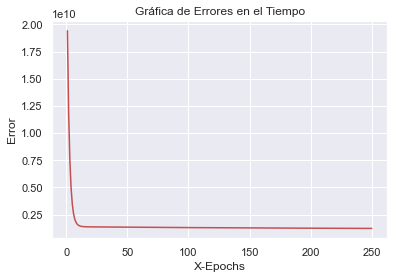

In [491]:
modelo = regresion_lineal(X1.to_numpy(), training_set.loc[:, ['SalePrice']].to_numpy(), 250, 10, 0.044)

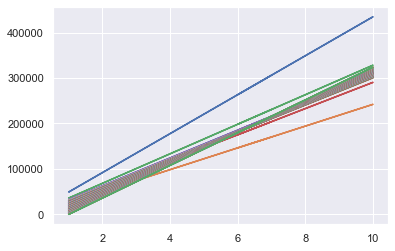

In [492]:
modelo.draw_models_in_time(3)